I was having some problems with the jupyer kernel. To override this, I had to manually install and initialise a kernel for the `iqblade` environment. This can be done with 

```python
python -m ipykernel install --user --name iqblade --display-name "Python (iqblade)"
```

but only if ipykernel is previously installed on the environment.
```python
pip install ipykernel
```

To install the `mysql.connector` in Mac I installed 
```python 
pip install mysql-connector-python-rf
```


In [40]:
%matplotlib inline
import mysql.connector as mysql
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [17]:
cnx = mysql.connect(user='root', password='galletas',
                              host='127.0.0.1',
                              database='iqblade')

In [18]:
cursor = cnx.cursor(named_tuple=True)

In [19]:
query = (
"SELECT table_name AS 'parent', column_name as 'link', referenced_table_name as 'child', referenced_column_name as 'linkc' "
"FROM information_schema.key_column_usage "
"WHERE referenced_table_name IS NOT NULL AND table_schema = 'iqblade'"
)

In [20]:
cursor.execute(query,10)

In [21]:
relations = list()
for row in cursor: 
    relations.append(list(row))

In [22]:
cursor.close()
cnx.close()

In [23]:
parents = pd.DataFrame({'parent':[rel[0] for rel in relations]})['parent'].unique()
children = pd.DataFrame({'child':[rel[2] for rel in relations]})['child'].unique()

In [24]:
nodes = np.unique(np.append(parents, children))

In [74]:
G = nx.DiGraph()
G.add_nodes_from(nodes)

In [76]:
edges = [(rel[0], rel[2], {'key': rel[1]}) for rel in relations]

In [77]:
G.add_edges_from(edges)

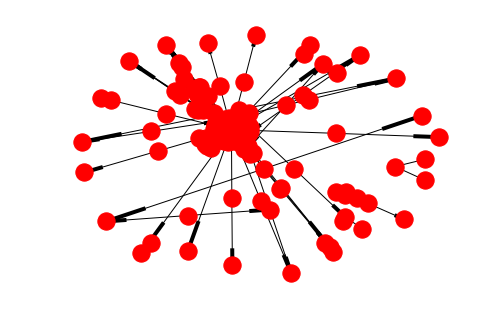

In [83]:
nx.draw_spring(G)

In [113]:
nx.write_gexf(G, "iqblade.gexf")